<a href="https://colab.research.google.com/github/ritisha22/Airbnb-booking-analysis/blob/main/Copy_of_Copy_of_Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# **Import libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## **Import dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
airbnb_data=pd.read_csv('/content/drive/MyDrive/dataset/Airbnb NYC 2019.csv')

## **Exploring the data**

In [ ]:
airbnb_data.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [ ]:
#checking the amount of rows given in dataset
len(airbnb_data)

48895

In [ ]:
#checking the type of every column
airbnb_data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
airbnb_data.shape

(48895, 16)

## **Checking for Null values**

In [ ]:
#checking the null value
airbnb_data.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

We have 4 columns in which there are missing values present. The columns- name and last_review are irrelevant for our analysis and hence we can drop these columns.

# **Filling the null values**

In [ ]:
#drop the irrelevant columns like name,last review
airbnb_data.drop(['name','last_review'],axis=1,inplace=True)
airbnb_data.head()

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
#fill the NaN values 'reviews_per_month'by 0
airbnb_data.reviews_per_month.fillna(0,inplace=True)
airbnb_data.head(10)

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,5099,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
6,5121,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
7,5178,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
8,5203,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
9,5238,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188


In [ ]:
#filling the null values in name column with'none'
airbnb_data.host_name.fillna('none',inplace=True)
airbnb_data.head()

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
airbnb_data.isnull().any()

id                                False
host_id                           False
host_name                         False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [ ]:
airbnb_data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## **Summary of the dataset**



*  **id**:An unique id for the airbnb listing (numeric)
*   **name**:Name of the airbnb listed property (categorical)
*   **host_id**:An unique id for the host of the property (numeric)
*   **host_name**: Name of the host of the property (categorical)
*   **neighbourhood_group**: A group which consists of many neighbourhoods (categorical)
*   **neighbourhood**: Nearby properties of the place (categorical)
*   **room_type:**Type of a room in the listed property (categorical)
*   price:Cost of stay (numeric)
*   **number_of_reviews**: Reviews given to the property and host (numeric)
*   **reviews_per_month**: Average reviews over a month (numeric)
*   **availability_365**: Availability of the property out of 365 days (numeric)















In [ ]:
airbnb_data.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.180221,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.209783,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.018758,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.138516,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.050564,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.124905,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.589407,-0.072376,0.172028
reviews_per_month,0.180221,0.209783,-0.018758,0.138516,-0.050564,-0.124905,0.589407,1.000000,-0.047312,0.163732
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.047312,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.163732,0.225701,1.000000


In [ ]:
airbnb_data.duplicated().sum()

0

In [ ]:
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   host_id                         48895 non-null  int64  
 2   host_name                       48895 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  reviews_per_month               48895 non-null  float64
 12  calculated_host_listings_count  

# **Unique values**

In [ ]:
##Neighbourhood Group
airbnb_data.neighbourhood_group.unique()


array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
airbnb_data.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

## **hosts with most listing in airbnb**

In [ ]:
# checking the top hosts
top_10host=airbnb_data.groupby(['host_id','host_name'])['host_id'].count().sort_values(ascending=False)[:10]
top_10host

host_id    host_name        
219517861  Sonder (NYC)         327
107434423  Blueground           232
30283594   Kara                 121
137358866  Kazuya               103
12243051   Sonder                96
16098958   Jeremy & Laura        96
61391963   Corporate Housing     91
22541573   Ken                   87
200380610  Pranjal               65
7503643    Vida                  52
Name: host_id, dtype: int64

## **Which hosts are the most busiest and why?**

In [ ]:
# top 10 hosts on the basis of least availability
busiest_hosts = airbnb_data.groupby(['host_id','host_name'])['availability_365'].mean().sort_values(ascending=True)
print(busiest_hosts )

host_id    host_name
2438       Tasos          0.0
10263977   A              0.0
10264372   Tyrell         0.0
10264377   Anthony        0.0
41757762   Sara           0.0
                        ...  
42237225   Orlando      365.0
262287464  Daniel       365.0
165448425  Shana        365.0
36881439   Etkin        365.0
12112004   Kylie        365.0
Name: availability_365, Length: 37439, dtype: float64




*   We can see that there are few hosts who aren't even available for a day. Tasos, Tyrell, Anthony are a few to name and it is clear that reviews aren't related to availability as we can see that there are no hosts with the most reviews being busy or we can say that people in general doesn't only prefer hosts with the most reviews.



# **Data visualization**

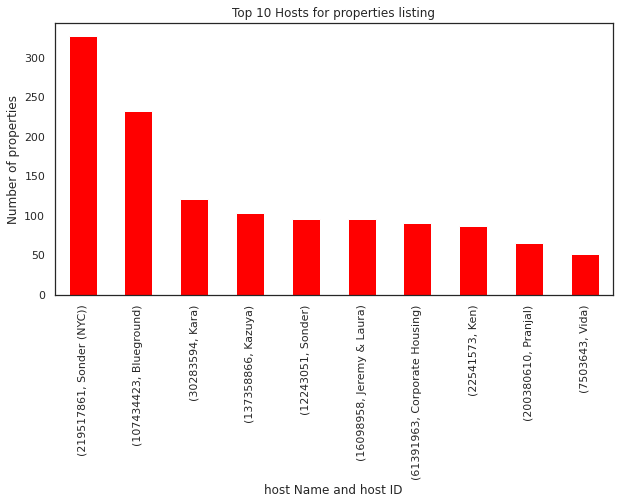

In [ ]:
top_10host.plot.bar(figsize=(10,5),color='red')
plt.xlabel('host Name and host ID')
plt.ylabel('Number of properties')
plt.title('Top 10 Hosts for properties listing')
plt.show()


* we can clearly see in the graph that sonder has the highest number of properties listed.



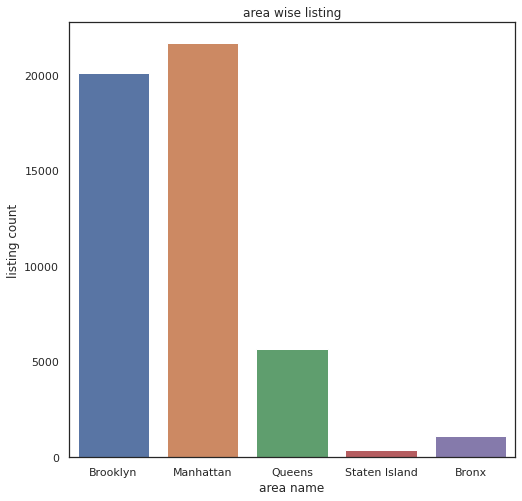

In [ ]:
# area wise listing 
sns.countplot(airbnb_data['neighbourhood_group'])
plt.title('area wise listing')
plt.xlabel('area name')
plt.ylabel('listing count')
plt.show()



*  Manhattan has most number of listing
*  after Manhattan Brooklyn has most number of listing



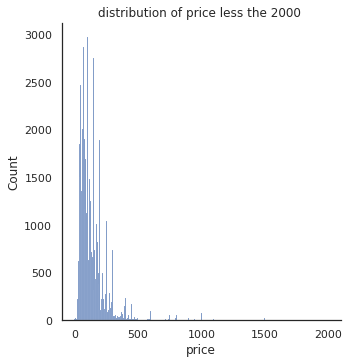

In [ ]:
# distribution of price less then 1000
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('white')
sns.displot(airbnb_data[airbnb_data.price<2000].price)
plt.title('distribution of price less the 2000 ')
plt.show()


 

*  price of most of listings are 10-200


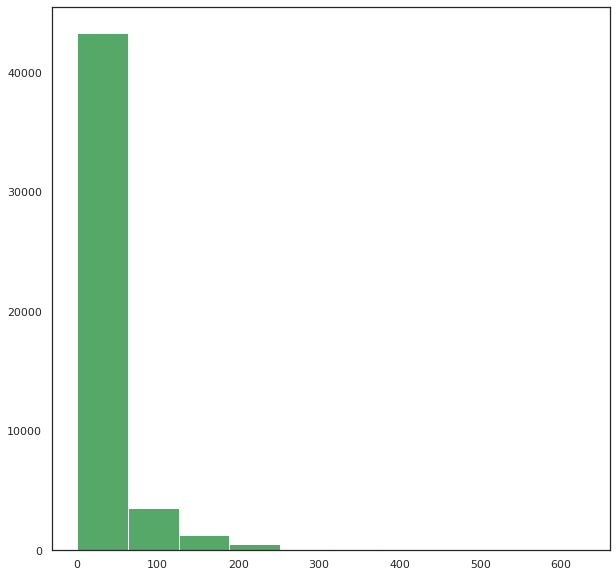

In [ ]:
# check the number of reviews
plt.hist(airbnb_data['number_of_reviews'],color='g',rwidth=4)
plt.show()

In [ ]:
#top host on the basis of review
host_review=airbnb_data.groupby(['host_id','host_name'])['number_of_reviews'].mean().sort_values(ascending=False)[:10]
print(host_review)

host_id   host_name     
47621202  Dona              602.500000
4734398   Jj                599.333333
2369681   Carol             540.000000
12949460  Asa               488.000000
792159    Wanda             480.000000
37312959  Maya              454.600000
2321321   Lloyd             454.000000
277379    Agnes             448.500000
307962    Dennis & Naoko    441.000000
97086824  Miss Dy           434.000000
Name: number_of_reviews, dtype: float64


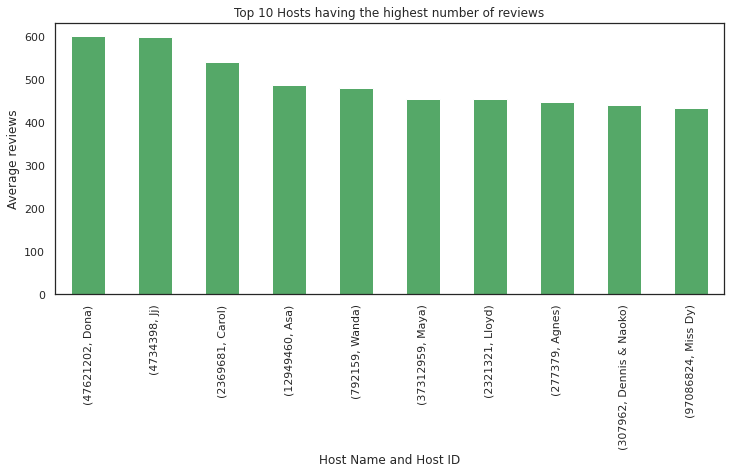

In [ ]:
# host who got the most average reviews
host_review.plot.bar(figsize=(12,5),color='g')
plt.xlabel('Host Name and Host ID')
plt.ylabel('Average reviews')
plt.title('Top 10 Hosts having the highest number of reviews')
plt.show()

**Here we can see Dona has got the most number of average review
**

In [7]:
#Average review per month
host_review_month=airbnb_data.groupby(['host_id','host_name'])['reviews_per_month'].mean().sort_values(ascending=False)[:10]
print(host_review_month)

host_id    host_name
228415932  Louann       20.940000
244361589  Row NYC      18.620000
156684502  Nalicia      18.126667
217379941  Brent        15.780000
47621202   Dona         13.990000
26432133   Danielle     13.604000
256290334  Aisling      13.420000
257832461  Stephanie    13.330000
111841534  Malini       13.150000
27287203   Ben          13.130000
Name: reviews_per_month, dtype: float64


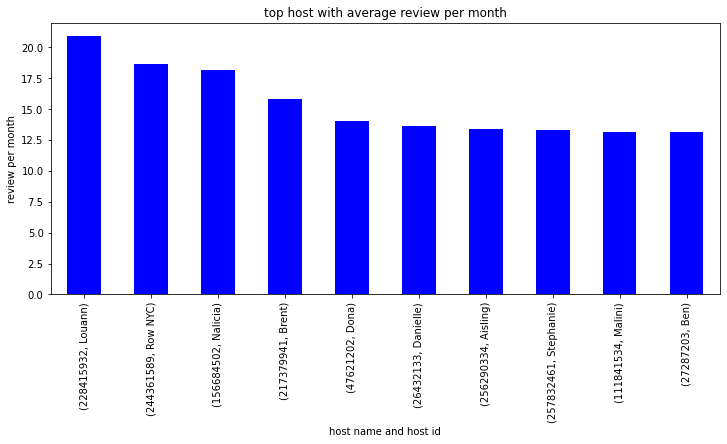

In [13]:
host_review_month.plot.bar(figsize=(12,5),color='b')
plt.xlabel('host name and host id')
plt.ylabel('review per month')
plt.title('top host with average review per month')
plt.show()


**The plot above shows that Louann receives 20.9 reviews approximately every month which stands out to be the highest among all other hosts in NYC.**

## **ROOM TYPE COUNT**

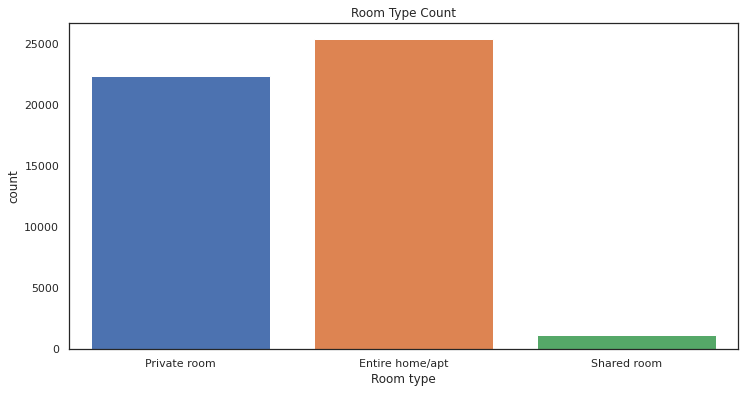

In [ ]:
sns.countplot(airbnb_data['room_type'],saturation=2)
plt.title('Room Type Count')
plt.xlabel('Room type')
plt.ylabel('count')
plt.show()


*  we can see Entire home/apt type is most occupied 



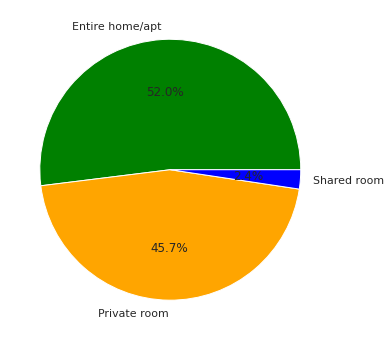

In [ ]:
rtype=airbnb_data['room_type'].value_counts().index
occurance_count=airbnb_data['room_type'].value_counts().values
plt.pie(occurance_count,labels=rtype,autopct='%0.1f%%',colors=['green','orange','blue'])
plt.show()



*   Graph shows that Entire home/apt is most demanding room type
*   whereas shared room is least demanding room type




## **Which neighbourhood group has the most availability out of 365 days a year?**

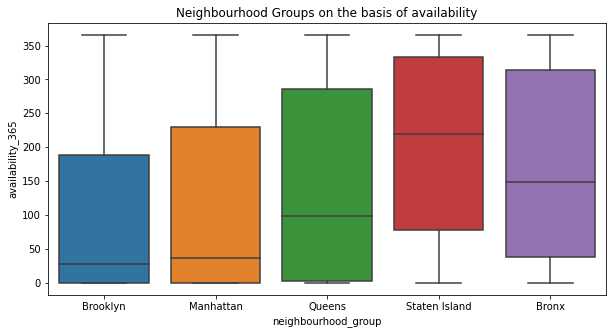

In [ ]:
# top neighbourhood groups on the basis of availability
plt.figure(figsize=(10,5))
plt.title('Neighbourhood Groups on the basis of availability')
sns.boxplot(data=airbnb_data, x='neighbourhood_group', y='availability_365')
plt.show()

## **Locations/Map of Neighbourhood Groups**

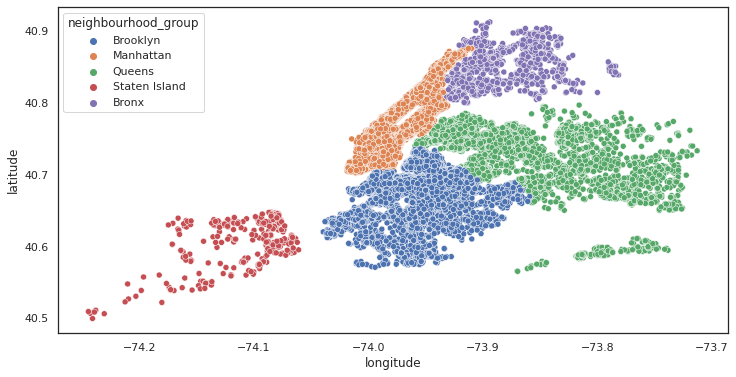

In [ ]:
sns.set(rc={'figure.figsize':(12,6)})
sns.set_style('white')
sns.scatterplot(x=airbnb_data.longitude,y=airbnb_data.latitude,hue=airbnb_data.neighbourhood_group)
